# Summary
This notebook makes use of logistic regression to determine if a candidate will win based on the following features

1. 'ind_con'
2. 'net_ope_exp'
3. 'tot_con'
4. 'tot_dis'
5. 'net_con'
6. 'ope_exp'	
7. 'tot_rec'

logistic regression was used on

1. The imbalanced data
2. After undersampling the majority class ('N')
3. After smoting both classes to get a balanced data
4. Label encoding was used on 'can_off' and 'can_inc_cha_ope_sea' and added to the features of the balanced data.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/HamoyeHQ/12-campaign-finance/master/data/new_project_data1.csv')

In [42]:
df.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,Y


### Checking if data is balanced

In [43]:
df.winner.value_counts()

N    1087
Y     464
Name: winner, dtype: int64

In [44]:
l,w=df.winner.value_counts()
print('Winners',w)
print('Loosers',l)

Winners 464
Loosers 1087


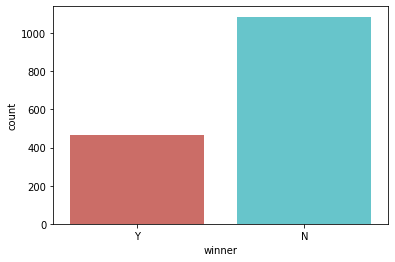

In [45]:
sns.countplot(x='winner',data=df,palette='hls')
plt.show()
# The data is clearly imbalanced

### Modelling with the imbalanced data

In [46]:
# Converting values in the winner column to float values i.e Y=1.0 and N=0.0
df['winner'] = df['winner'].apply(lambda val: float(int(val=='Y')))
df.winner.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: winner, dtype: float64

In [47]:
x_unbal=df[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp',	'tot_rec']]
y_unbal = df.winner

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x_unbal, y_unbal, test_size=0.3, random_state=4)
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

Accuracy 0.80


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84       318
         1.0       0.64      0.90      0.75       148

    accuracy                           0.80       466
   macro avg       0.79      0.83      0.79       466
weighted avg       0.84      0.80      0.81       466



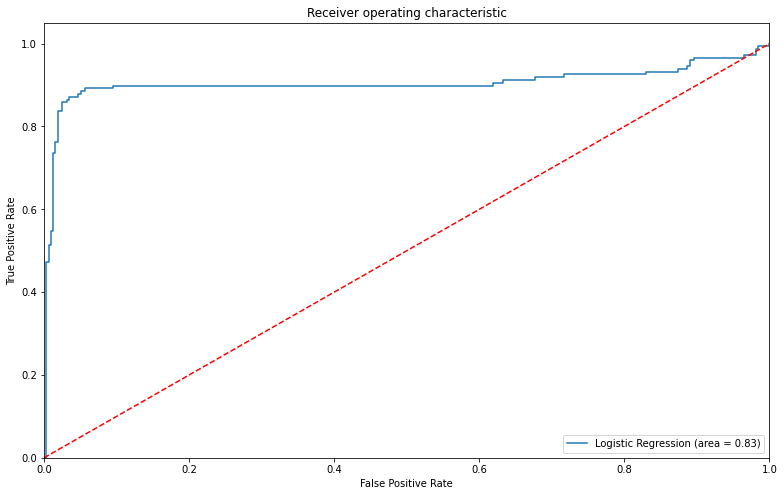

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Handling the imbalanced data by undersampling 'N'

In [51]:
# undersample the N class and shuffle
s1 = df[df.winner == 0.0].sample(464)
s2 = df[df.winner == 1.0].sample(464)

print(len(s1),len(s2))
df_train = pd.concat([s1,s2])

464 464


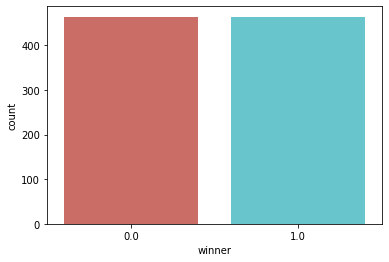

In [52]:
sns.countplot(x='winner',data=df_train,palette='hls')
plt.show()

In [53]:
df_train.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
1374,H6MN02198,"MILLER, DARLENE",H,MN,2.0,REP,OPEN,PRIOR LAKE,MN,55372.0,1/1/2016,9/30/2016,334749.70,369722.70,411749.70,428258.47,355849.70,372358.47,431081.39,0.0
569,H6NC10158,"MILLARD, CARL ANDREW",H,NC,10.0,DEM,CHALLENGER,TRYON,NC,28782.0,1/1/2015,10/19/2016,252348.92,267103.13,253848.92,269962.53,253348.92,267103.13,380754.77,0.0
822,S6CO00283,"KEYSER, JON",S,CO,0.0,REP,CHALLENGER,GREENWOOD VILLAGE,CO,80111.0,1/1/2016,9/30/2016,416014.00,557621.00,438577.00,650704.00,345527.00,557654.00,650705.00,0.0
1340,H2FL14152,"GOSS, CHAUNCEY P",H,FL,19.0,REP,OPEN,FORT MYERS,FL,33902.0,4/1/2016,9/30/2016,349253.79,386429.01,353253.79,392853.79,350553.79,386429.01,392853.79,0.0
538,H6OH09099,"LARSON, DONALD PHILIP",H,OH,9.0,REP,CHALLENGER,LAKEWOOD,OH,44107.0,10/1/2015,10/19/2016,21785.00,24123.84,22659.39,25123.84,22659.39,24123.84,27859.39,0.0


In [54]:
x=df_train[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp',	'tot_rec']]
x.head()

,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec
1374,334749.70,369722.70,411749.70,428258.47,355849.70,372358.47,431081.39
569,252348.92,267103.13,253848.92,269962.53,253348.92,267103.13,380754.77
822,416014.00,557621.00,438577.00,650704.00,345527.00,557654.00,650705.00
1340,349253.79,386429.01,353253.79,392853.79,350553.79,386429.01,392853.79
538,21785.00,24123.84,22659.39,25123.84,22659.39,24123.84,27859.39


In [55]:
y = df_train.winner
y.head()

1374    0.0
569     0.0
822     0.0
1340    0.0
538     0.0
Name: winner, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
lreg = LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

Accuracy 0.76


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 76  60]
 [  7 136]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.56      0.69       136
         1.0       0.69      0.95      0.80       143

    accuracy                           0.76       279
   macro avg       0.80      0.75      0.75       279
weighted avg       0.80      0.76      0.75       279



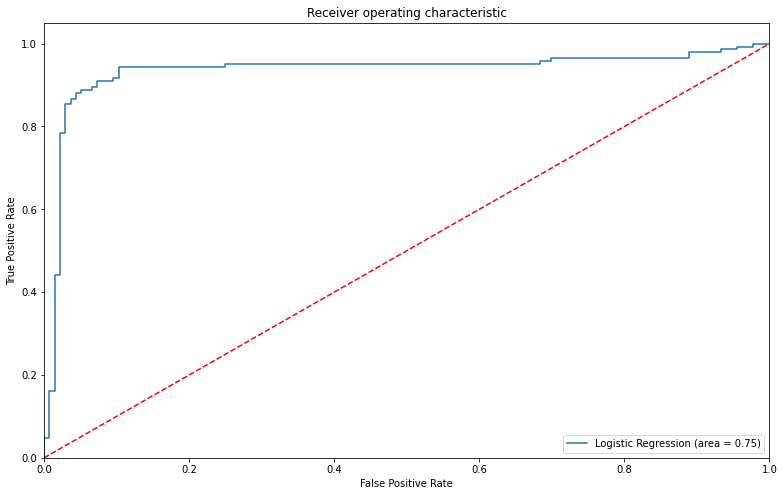

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Balancing the data by smoting both classes

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_unbal, y_unbal, test_size=0.3, random_state=4)
lreg = LogisticRegression()

In [62]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
columns = x_train.columns
sm_x,sm_y=sm.fit_sample(x_train, y_train)
sm_x = pd.DataFrame(data=sm_x,columns=columns )
# sm_y= pd.DataFrame(data=sm_y,columns=['winner'])

sm_y= pd.Series(data=sm_y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [63]:
sm_y.value_counts()

1.0    769
0.0    769
dtype: int64

In [64]:
lreg.fit(sm_x, sm_y)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

Accuracy 0.76


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80       318
         1.0       0.58      0.94      0.71       148

    accuracy                           0.76       466
   macro avg       0.77      0.81      0.76       466
weighted avg       0.84      0.76      0.77       466



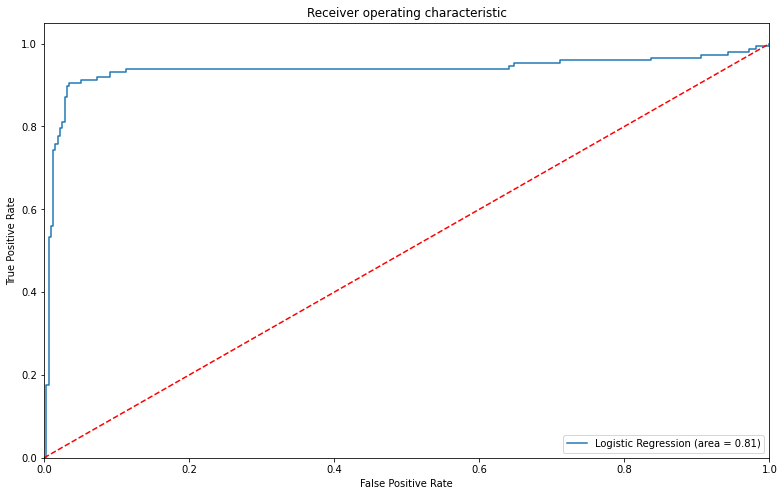

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [67]:
df_train.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
1374,H6MN02198,"MILLER, DARLENE",H,MN,2.0,REP,OPEN,PRIOR LAKE,MN,55372.0,1/1/2016,9/30/2016,334749.70,369722.70,411749.70,428258.47,355849.70,372358.47,431081.39,0.0
569,H6NC10158,"MILLARD, CARL ANDREW",H,NC,10.0,DEM,CHALLENGER,TRYON,NC,28782.0,1/1/2015,10/19/2016,252348.92,267103.13,253848.92,269962.53,253348.92,267103.13,380754.77,0.0
822,S6CO00283,"KEYSER, JON",S,CO,0.0,REP,CHALLENGER,GREENWOOD VILLAGE,CO,80111.0,1/1/2016,9/30/2016,416014.00,557621.00,438577.00,650704.00,345527.00,557654.00,650705.00,0.0
1340,H2FL14152,"GOSS, CHAUNCEY P",H,FL,19.0,REP,OPEN,FORT MYERS,FL,33902.0,4/1/2016,9/30/2016,349253.79,386429.01,353253.79,392853.79,350553.79,386429.01,392853.79,0.0
538,H6OH09099,"LARSON, DONALD PHILIP",H,OH,9.0,REP,CHALLENGER,LAKEWOOD,OH,44107.0,10/1/2015,10/19/2016,21785.00,24123.84,22659.39,25123.84,22659.39,24123.84,27859.39,0.0


In [68]:
df.can_off.nunique()

3

In [69]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train.can_off= label_encoder.fit_transform(df_train.can_off) 
df_train.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
1374,H6MN02198,"MILLER, DARLENE",0,MN,2.0,REP,OPEN,PRIOR LAKE,MN,55372.0,1/1/2016,9/30/2016,334749.70,369722.70,411749.70,428258.47,355849.70,372358.47,431081.39,0.0
569,H6NC10158,"MILLARD, CARL ANDREW",0,NC,10.0,DEM,CHALLENGER,TRYON,NC,28782.0,1/1/2015,10/19/2016,252348.92,267103.13,253848.92,269962.53,253348.92,267103.13,380754.77,0.0
822,S6CO00283,"KEYSER, JON",2,CO,0.0,REP,CHALLENGER,GREENWOOD VILLAGE,CO,80111.0,1/1/2016,9/30/2016,416014.00,557621.00,438577.00,650704.00,345527.00,557654.00,650705.00,0.0
1340,H2FL14152,"GOSS, CHAUNCEY P",0,FL,19.0,REP,OPEN,FORT MYERS,FL,33902.0,4/1/2016,9/30/2016,349253.79,386429.01,353253.79,392853.79,350553.79,386429.01,392853.79,0.0
538,H6OH09099,"LARSON, DONALD PHILIP",0,OH,9.0,REP,CHALLENGER,LAKEWOOD,OH,44107.0,10/1/2015,10/19/2016,21785.00,24123.84,22659.39,25123.84,22659.39,24123.84,27859.39,0.0


In [70]:
x = df_train[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp','tot_rec','can_off']]
y = df_train.winner
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
columns = x_train.columns
sm_x,sm_y=sm.fit_sample(x_train, y_train)
sm_x = pd.DataFrame(data=sm_x,columns=columns )
# sm_y= pd.DataFrame(data=sm_y,columns=['winner'])

sm_y= pd.Series(data=sm_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [71]:
lreg.fit(sm_x, sm_y)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy 0.76
              precision    recall  f1-score   support

         0.0       0.93      0.53      0.67       131
         1.0       0.70      0.97      0.81       148

    accuracy                           0.76       279
   macro avg       0.81      0.75      0.74       279
weighted avg       0.81      0.76      0.75       279



In [72]:
df_train.can_inc_cha_ope_sea.nunique()

3

In [73]:
df_train2 = df_train.copy()

# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train2.can_inc_cha_ope_sea= label_encoder.fit_transform(df_train2.can_inc_cha_ope_sea) 
df_train2.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
1374,H6MN02198,"MILLER, DARLENE",0,MN,2.0,REP,2,PRIOR LAKE,MN,55372.0,1/1/2016,9/30/2016,334749.70,369722.70,411749.70,428258.47,355849.70,372358.47,431081.39,0.0
569,H6NC10158,"MILLARD, CARL ANDREW",0,NC,10.0,DEM,0,TRYON,NC,28782.0,1/1/2015,10/19/2016,252348.92,267103.13,253848.92,269962.53,253348.92,267103.13,380754.77,0.0
822,S6CO00283,"KEYSER, JON",2,CO,0.0,REP,0,GREENWOOD VILLAGE,CO,80111.0,1/1/2016,9/30/2016,416014.00,557621.00,438577.00,650704.00,345527.00,557654.00,650705.00,0.0
1340,H2FL14152,"GOSS, CHAUNCEY P",0,FL,19.0,REP,2,FORT MYERS,FL,33902.0,4/1/2016,9/30/2016,349253.79,386429.01,353253.79,392853.79,350553.79,386429.01,392853.79,0.0
538,H6OH09099,"LARSON, DONALD PHILIP",0,OH,9.0,REP,0,LAKEWOOD,OH,44107.0,10/1/2015,10/19/2016,21785.00,24123.84,22659.39,25123.84,22659.39,24123.84,27859.39,0.0


In [76]:

x=df_train2[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp',	'tot_rec','can_off','can_inc_cha_ope_sea']]
y = df_train2.winner

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
columns = x_train.columns
sm_x,sm_y=sm.fit_sample(x_train, y_train)
sm_x = pd.DataFrame(data=sm_x,columns=columns )
# sm_y= pd.DataFrame(data=sm_y,columns=['winner'])

sm_y= pd.Series(data=sm_y)

lreg.fit(sm_x, sm_y)

y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

Accuracy 0.76
              precision    recall  f1-score   support

         0.0       0.93      0.53      0.67       131
         1.0       0.70      0.97      0.81       148

    accuracy                           0.76       279
   macro avg       0.81      0.75      0.74       279
weighted avg       0.81      0.76      0.75       279



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
